In [1]:
import pandas as pd
import numpy as np
import os
from subprocess import call

import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
%config InlineBackend.figure_format = 'retina' # retina display

---
# ANGLE PLOT
---

In [4]:
# Define the points of interest
# by files

myFolder = 'DA_out'
myFilesNames = os.listdir(myFolder)

myFiles = [myFolder+'/'+e for e in myFilesNames]

In [5]:
# Read the files and store the data in a pandas DataFrame

with open(myFiles[0]) as f:
    content = f.readlines()
content = [x.strip() for x in content]

# looking for the angles 
angles = []
for n in content:
    if n[:5]=='Angle':
        angles.append(float(n[-5:]))

# initiate DF

myDF = pd.DataFrame(index=myFiles,columns=angles,dtype=np.float64)

# Read files and fill the DF

for i in myFiles:
    with open(i) as f:
        content = f.readlines()
    content = [x.strip() for x in content]
    DA_min = []
    for n in content:
        if n[:7]=='Minimum':
            DA_min.append(float(n[10:14]))
    if len(DA_min) == len(angles):
        myDF.loc[i] = DA_min
    else:
        myDF.loc[i]=np.nan

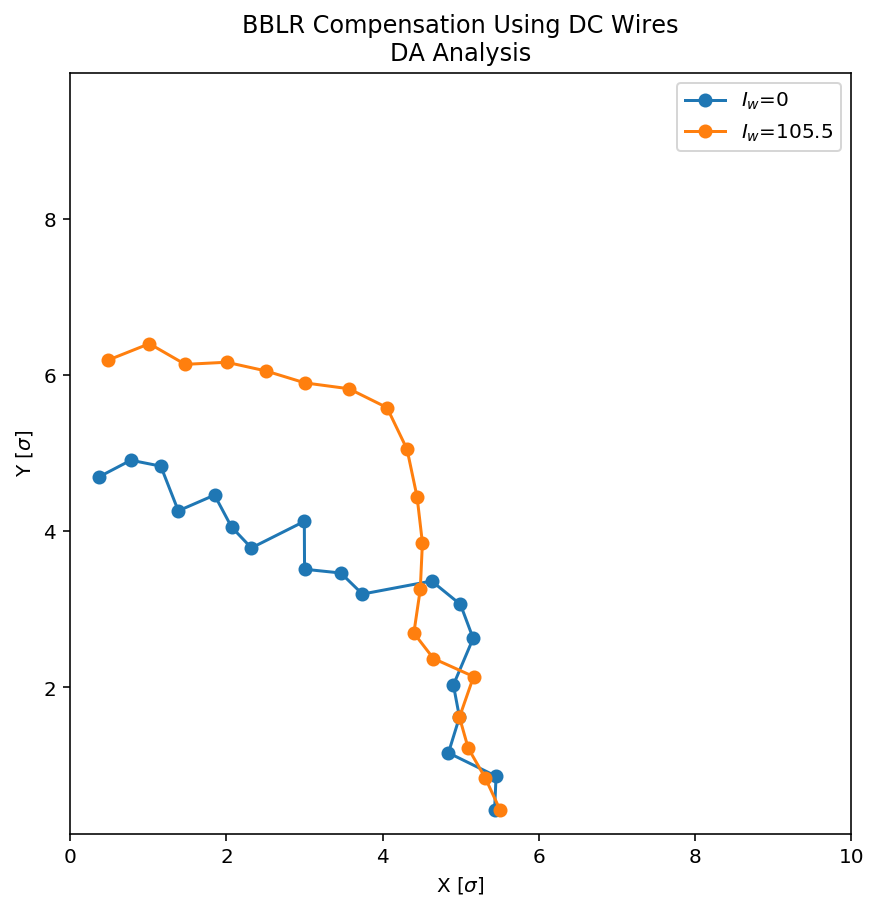

In [8]:
fig = plt.figure(figsize=(7,7))
currents = [0, 105.5]
count = 0
angles_rad = np.array(angles)*2*np.pi/360.
for i in myFiles:
    DA = myDF.loc[i].values
    x = DA*np.cos(angles_rad)
    y = DA*np.sin(angles_rad)
    plt.plot(x,y,'o-',label='$I_w$='+str(currents[count]))
    count=count+1
plt.axis('equal')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(loc='best',frameon=True)
plt.xlabel('X [$\\sigma$]')
plt.ylabel('Y [$\\sigma$]')
plt.title('BBLR Compensation Using DC Wires\nDA Analysis');
